In [1]:
## Goal: Explore data w/ visualizations for Player Stats dataset 

# Import Python pkgs pandas, numpy, matplotlib.pyplot, & seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.random as nr
import math

%matplotlib inline  
# Start of magic command which configures execution environment, to display graphics w/in notebook

In [2]:
# Load already prepared dataset, display shape, & explore first 10 rows of Pandas data frame

ABstats = pd.read_csv('ABMatchDataFULL.csv', header=0)
print(ABstats.shape)
ABstats.head(5)

(205, 11)


,Opposition Name,Date,Result,Location,Opposition Debutants,Debutants,Opposition tries in last 5 games,Tries in last 5 games,Opposition Rating,Rating,Games since last loss
0,Canada,2003-10-17,62,Melbourne,0,1,9,28,65.62,89.80,8
1,Tonga,2003-10-24,84,Brisbane,1,1,13,31,70.08,89.80,9
2,Wales,2003-11-02,16,Sydney,0,0,17,37,76.92,89.80,10
3,South Africa,2003-11-08,20,Melbourne,0,0,28,44,81.84,89.80,11
4,Australia,2003-11-15,-12,Sydney,0,0,41,45,86.20,90.41,12


In [3]:
ABstats.dtypes

Opposition Name                      object
Date                                 object
Result                                int64
Location                             object
Opposition Debutants                  int64
Debutants                             int64
Opposition tries in last 5 games      int64
Tries in last 5 games                 int64
Opposition Rating                   float64
Rating                              float64
Games since last loss                 int64
dtype: object

In [5]:
ABstats.columns

Index(['Opposition Name', 'Date', 'Result', 'Location', 'Opposition Debutants',
       'Debutants', 'Opposition tries in last 5 games',
       'Tries in last 5 games', 'Opposition Rating', 'Rating',
       'Games since last loss'],
      dtype='object')

In [7]:
# Compute & display frequency table for categorical variables w/pandas value_counts

def count_unique(ABstats, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(ABstats[col].value_counts())
        
cat_cols = ['Opposition Name', 'Date', 'Location']
count_unique(ABstats, cat_cols)


For column Opposition Name
Australia       46
South Africa    35
France          22
Argentina       17
England         16
Wales           15
Ireland         14
Italy            7
Scotland         7
Lions            6
Tonga            3
Samoa            3
Canada           3
Japan            3
Fiji             2
Georgia          1
Pacific Is       1
Romania          1
USA              1
Namibia          1
Portugal         1
Name: Opposition Name, dtype: int64

For column Date
2007-07-21    1
2013-08-17    1
2018-06-09    1
2005-06-25    1
2012-09-08    1
2018-10-27    1
2018-11-03    1
2018-11-17    1
2012-06-23    1
2014-11-01    1
2018-08-18    1
2005-08-13    1
2014-08-23    1
2014-06-21    1
2005-06-10    1
2004-07-17    1
2004-06-19    1
2005-07-09    1
2013-11-24    1
2009-09-12    1
2012-06-09    1
2003-10-17    1
2013-11-16    1
2012-10-20    1
2009-06-27    1
2015-10-09    1
2014-11-15    1
2017-06-24    1
2011-08-27    1
2016-08-27    1
             ..
2003-10-24    1
2003-11-

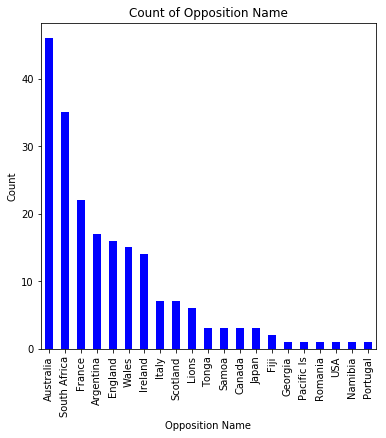

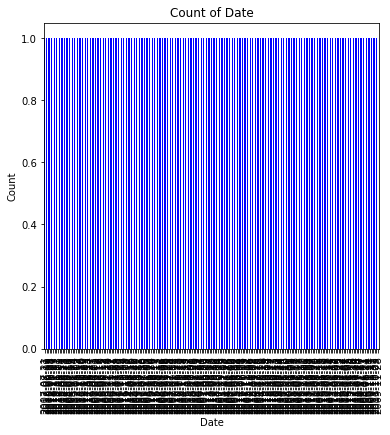

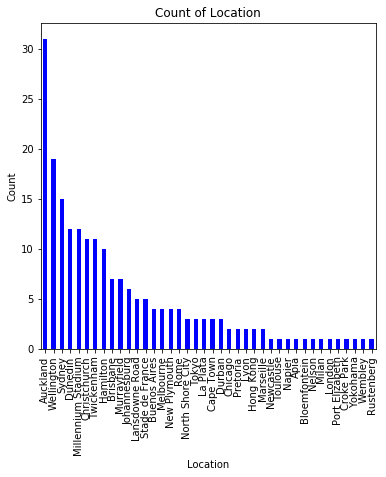

In [9]:
## Visualize distributions w/ 1 Dimensional Plots
# Step 1- Visualize frequency distributions of categorical variables w/ pandas Bar Chart plot.bar

def plot_bars(ABstats, cols):
    for col in cols:        # Iterates over list of columns
        fig = plt.figure(figsize=(6,6))    # Figure plot & axes defined using matplotlib
        ax = fig.gca()
        counts = ABstats[col].value_counts()    # Find counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue')    # Use plot.bar method from pandas on counts data frame
        ax.set_title('Count of ' + col)   # Give plot a main title w/ matplotlib
        ax.set_xlabel(col)    # Set x-axis labels w/ matplotlib
        ax.set_ylabel('Count')   # Set y-axis label w/ matplotlib
        plt.show()
        
cat_cols = ['Opposition Name', 'Date', 'Location']
plot_bars(ABstats, cat_cols)

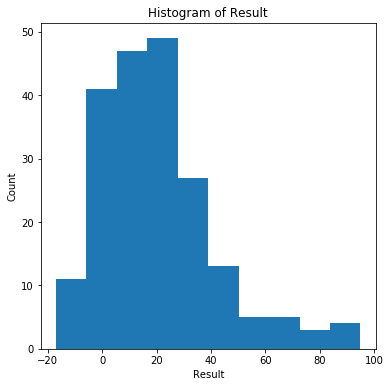

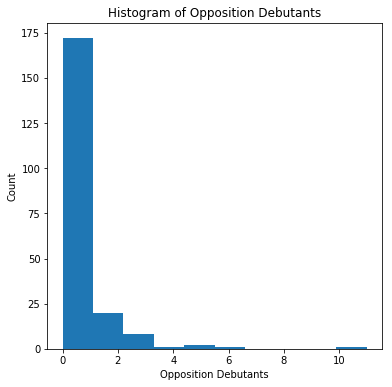

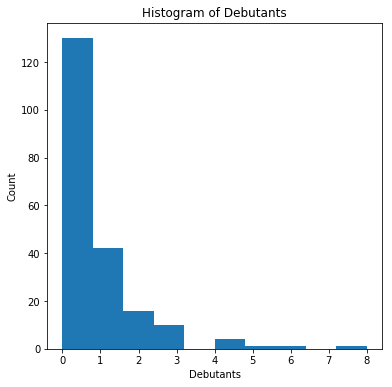

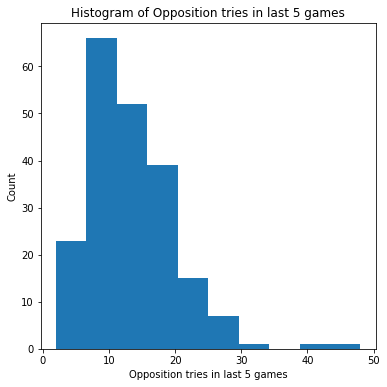

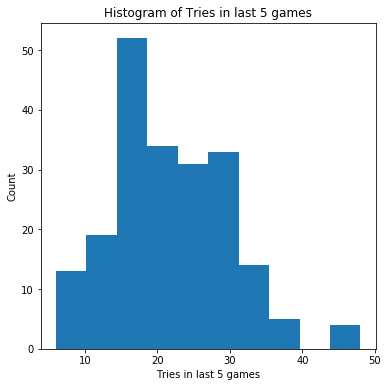

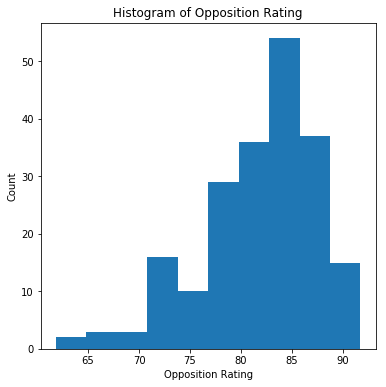

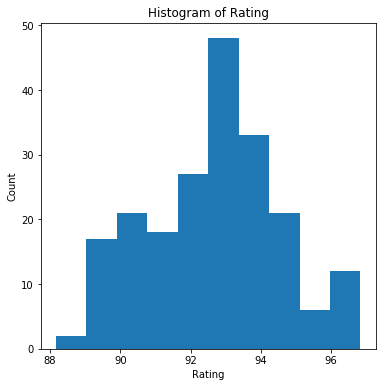

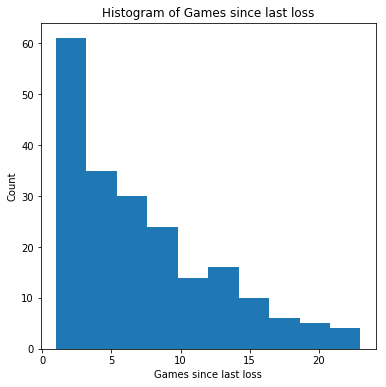

In [10]:
## Visualize Distributions w/ 1 Dimensional Plots
#Step 2- Visualize binned distributions of numerical feature variables w/ pandas histograms plot.hist

def plot_histogram(ABstats, cols, bins = 10):
    for col in cols:        # Iterates over list of columns
        fig = plt.figure(figsize=(6,6))    # Figure plot & axes defined using matplotlib
        ax = fig.gca()
        ABstats[col].plot.hist(ax = ax, bins = bins)    # Use plot.hist method from pandas on subset of data frame   
        ax.set_title('Histogram of ' + col)   # Give plot a main title w/ matplotlib
        ax.set_xlabel(col)    # Set x-axis labels w/ matplotlib
        ax.set_ylabel('Count')   # Set y-axis label w/ matplotlib
        plt.show()
        
num_cols = ['Result', 'Opposition Debutants',
       'Debutants', 'Opposition tries in last 5 games',
       'Tries in last 5 games', 'Opposition Rating', 'Rating',
       'Games since last loss']

plot_histogram(ABstats, num_cols)    

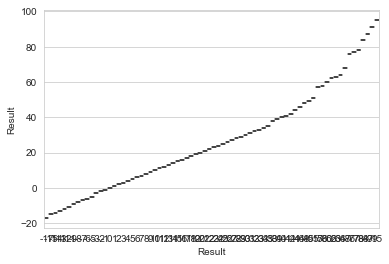

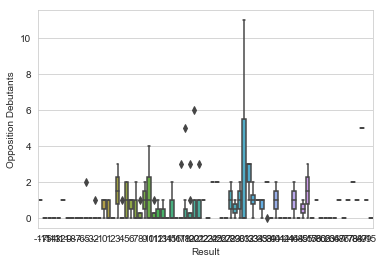

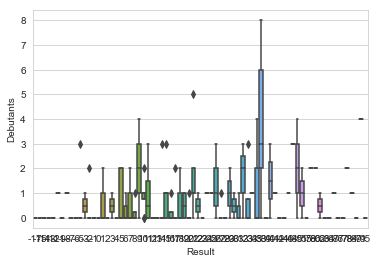

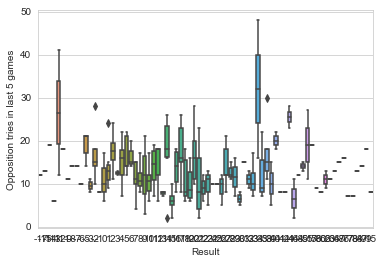

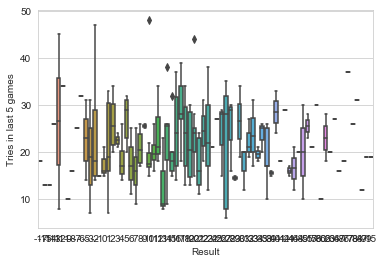

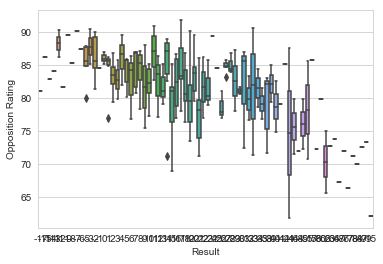

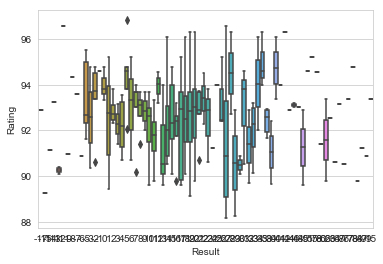

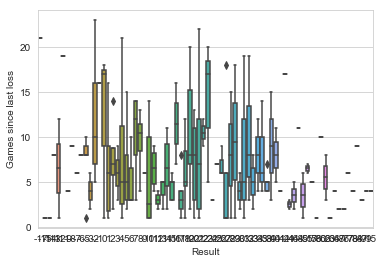

In [11]:
#Below- Visualize Class Separation by Numeric Features

def plot_box(ABstats, cols, col_x = 'Result'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data = ABstats)
        plt.xlabel(col_x)     # Label x-axis
        plt.ylabel(col)     # Label y-axis
        plt.show()
        
num_cols = ['Result', 'Opposition Debutants',
       'Debutants', 'Opposition tries in last 5 games',
       'Tries in last 5 games', 'Opposition Rating', 'Rating',
       'Games since last loss']
plot_box(ABstats, num_cols)

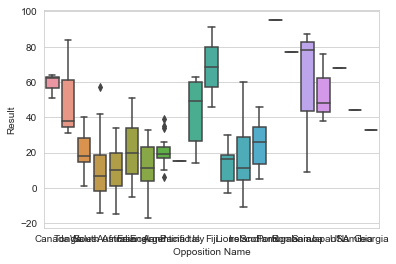

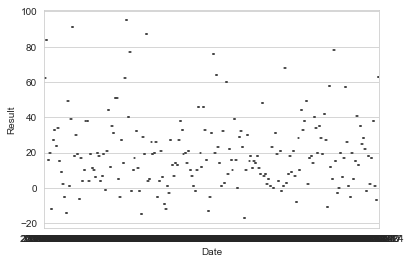

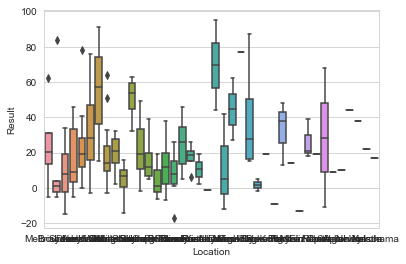

In [12]:
#Below- Plot Categorical & Numerical Varibles w/ Seaborn boxplot
  # Shows inner two quartiles w/in the box. Length of box shows interquartile range.
  # Line w/in box shows median. Whiskers are 1.5 times the interquartile range (extreme values).
  # Outliers are just a symbol

def plot_box(ABstats, cols, col_y = 'Result'):
    for col in cols:   # Iterates over list of columns
        sns.set_style("whitegrid")   # Set style for plot grid
        sns.boxplot(col, col_y, data = ABstats)   # Use boxplot method from seaborn 
        plt.xlabel(col)   # Set x-axis label w/ matplotlib
        plt.ylabel(col_y)   # Set y-axis label w/ matplotlib
        plt.show()
        
cat_cols = ['Opposition Name', 'Date', 'Location']

plot_box(ABstats, cat_cols)

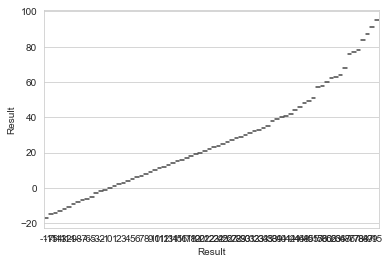

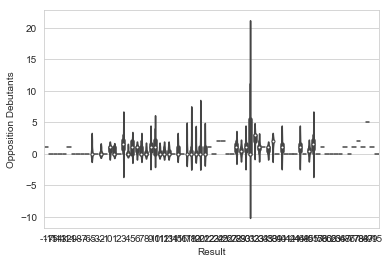

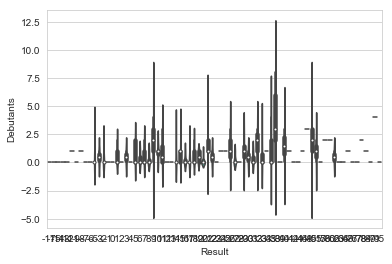

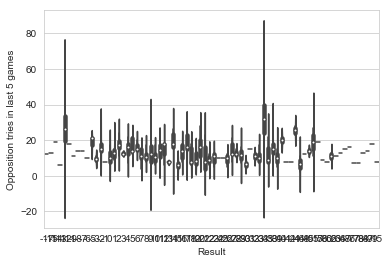

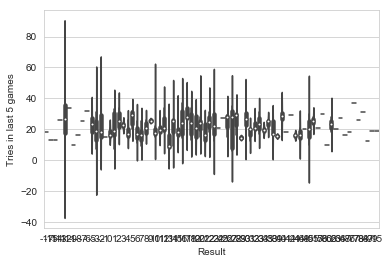

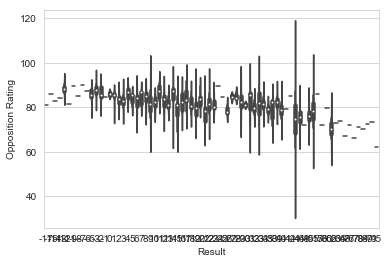

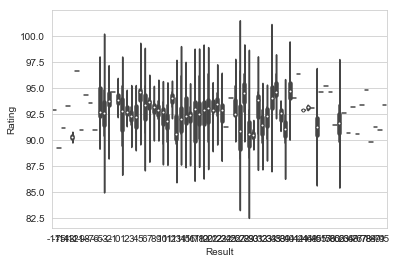

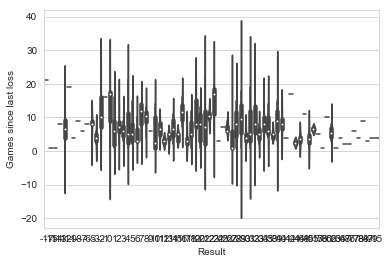

In [13]:
#Below- Violin Plot Visualizations for Numeric Feature Separation

def plot_violin(ABstats, cols, col_x = 'Result'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col_x, col, data = ABstats)
        plt.xlabel(col_x)     #Label x-axis
        plt.ylabel(col)     #Label y-axis
        plt.show()
        
plot_violin(ABstats, num_cols)